In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Logistic Regression
# Set the path to the csv files
data_path = '/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/Feauture Importance/Overall/LR'

# Months
months = ['june', 'july', 'august', 'september', 'october']

datasets = {}

for month_file in months:
    name = 'dtf' + month_file[1:]
    dataset_path = f"{data_path}/{month_file}_features.csv"

    # Importing the dataset and keeping only selected columns
    dataset = pd.read_csv(dataset_path)
    datasets[name] = dataset

# Concatenate all the datasets
df = pd.concat(datasets, ignore_index=True)

# Drop the first column 
df = df.drop(df.columns[0], axis=1)

#calculate mean and standard deviation of Coefficient, grouped by team
output = df.groupby(['Feature'], as_index=False).agg({'Coefficient':['mean','std']})

#rename columns
output.columns = ['Feature', 'mean', 'std']

# Add absolute value of mean
output['abs_mean'] = output['mean'].abs()

# Sort by absolute value of mean
output_lr = output.sort_values(by=['abs_mean'], ascending=False).reset_index(drop=True)

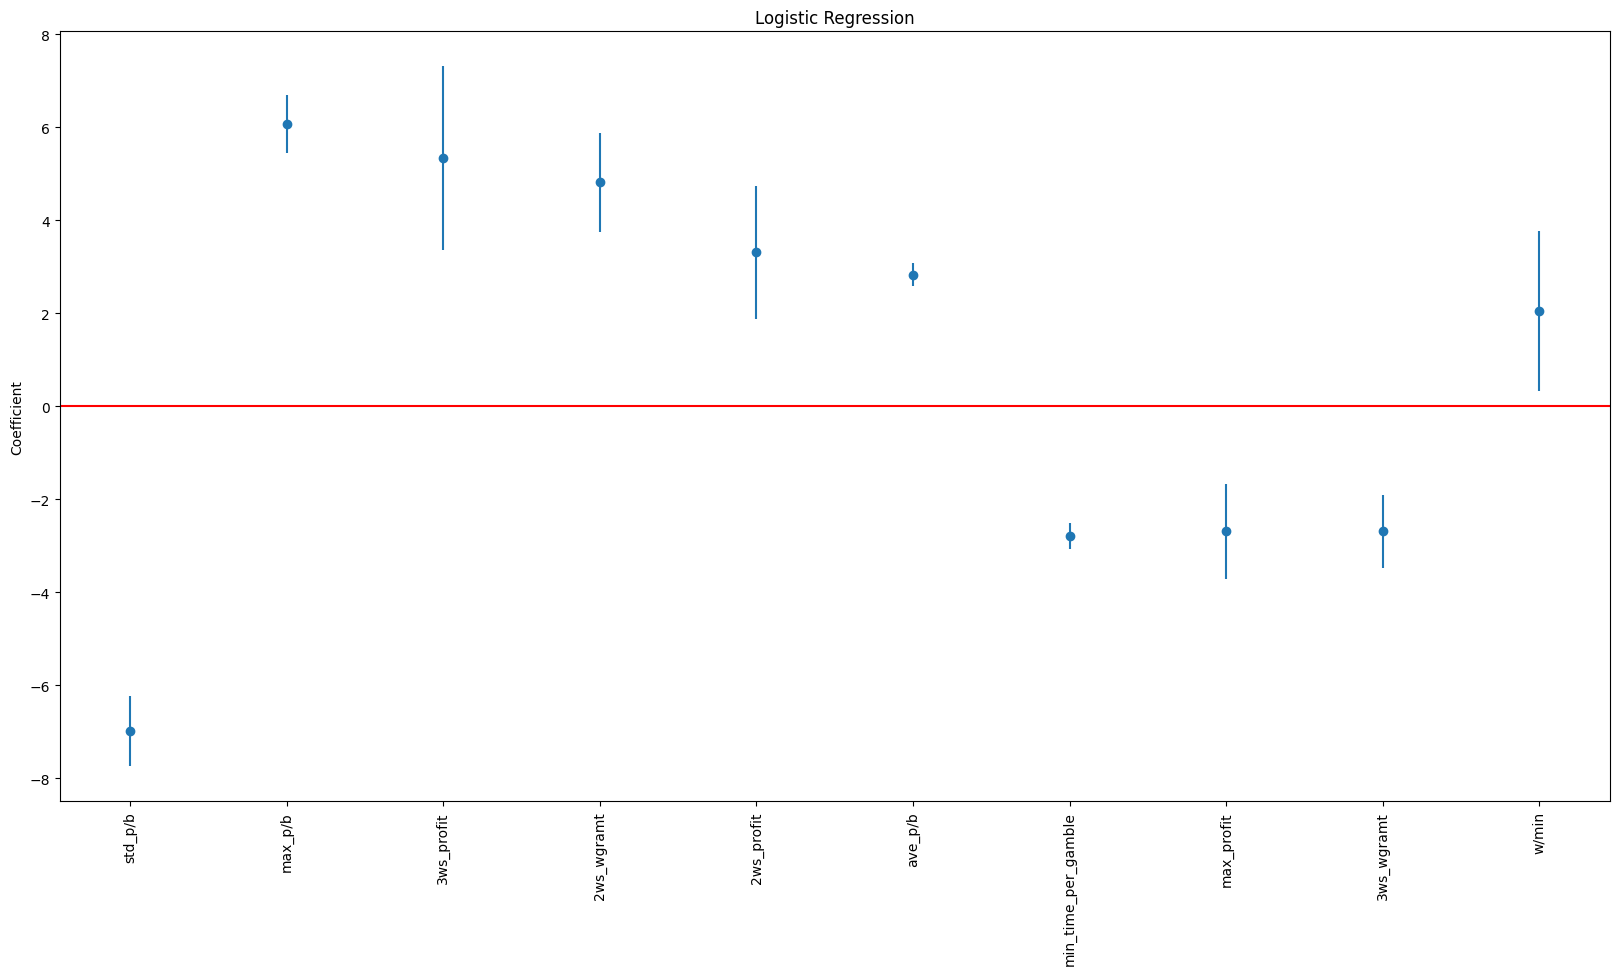

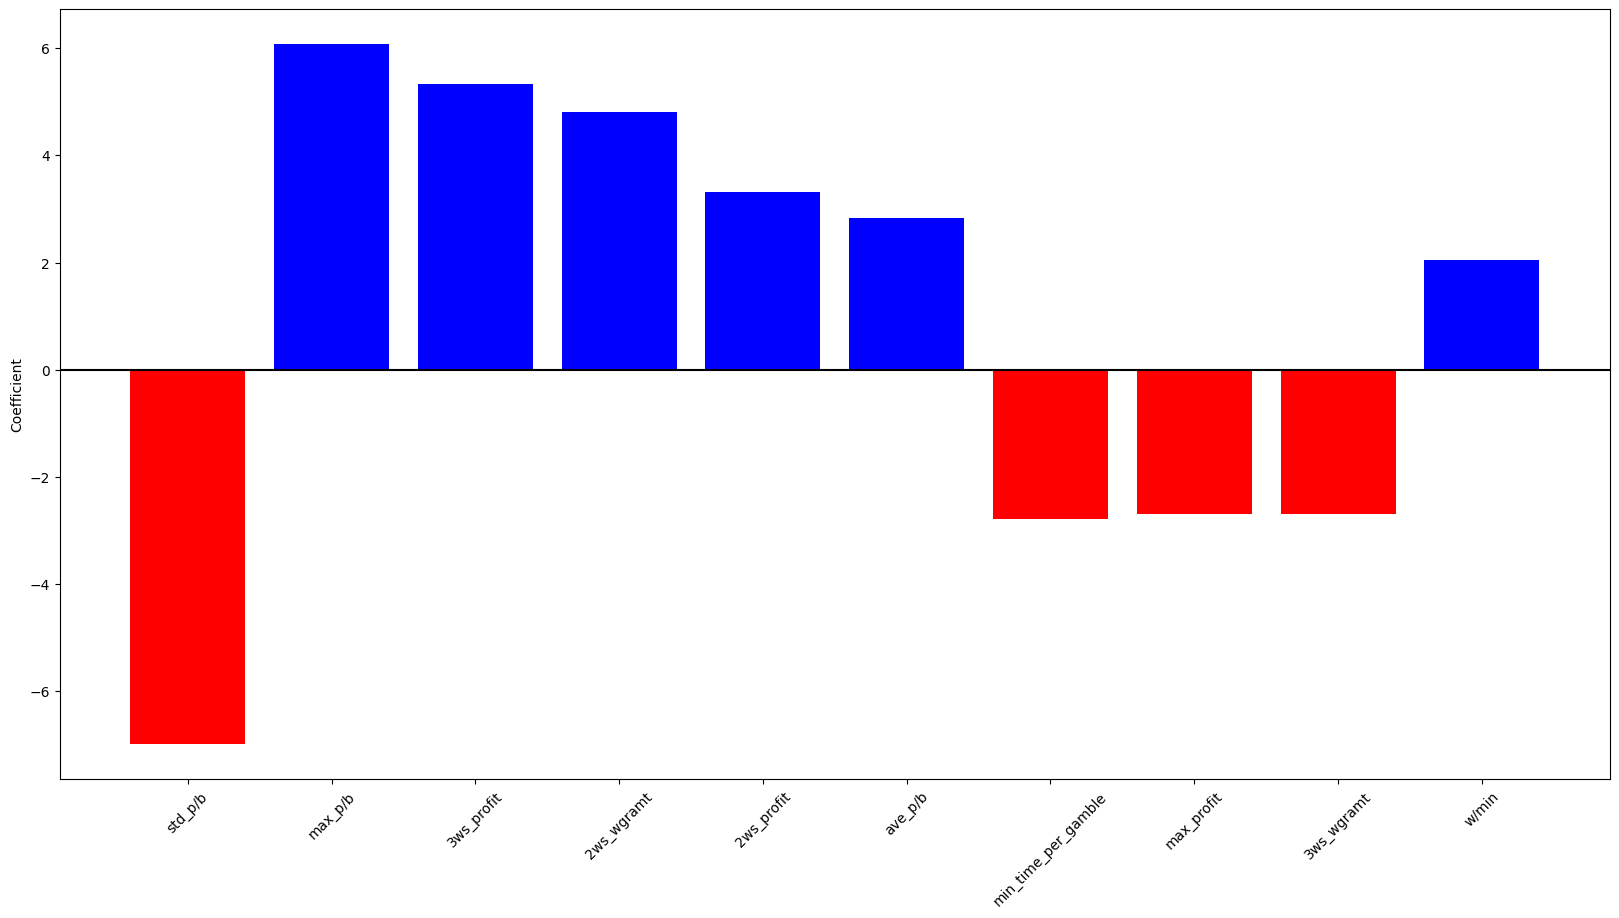

In [50]:
# Plot results
import matplotlib.pyplot as plt

# Keep only the features with absolute value of mean greater than 1
# output_lr = output_lr[output_lr['abs_mean'] > 1]

#Top 10
output_lr = output_lr.head(10)

# Set the figure size
plt.rcParams["figure.figsize"] = (20,10)

# Plot the results
plt.errorbar(output_lr['Feature'], output_lr['mean'], yerr=output_lr['std'], fmt='o')
plt.xticks(rotation=90)
plt.ylabel('Coefficient')
plt.title('Logistic Regression')
# Add a horizontal line at 0
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Make a bar plot
plt.bar(output_lr['Feature'], output_lr['mean'], color=np.where(output_lr['mean']<0, 'red', 'blue'))
plt.xticks(rotation=45)
plt.ylabel('Coefficient')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

In [44]:
print(output_lr)

               Feature      mean       std  abs_mean
0              std_p/b -6.990984  0.756380  6.990984
1              max_p/b  6.069579  0.624974  6.069579
2           3ws_profit  5.332023  1.974249  5.332023
3           2ws_wgramt  4.812687  1.069522  4.812687
4           2ws_profit  3.308014  1.434223  3.308014
5              ave_p/b  2.823400  0.249168  2.823400
6  min_time_per_gamble -2.790341  0.281118  2.790341
7           max_profit -2.693753  1.016715  2.693753
8           3ws_wgramt -2.691563  0.779435  2.691563
9                w/min  2.041539  1.725389  2.041539


In [27]:
## SVM
# Set the path to the csv files
data_path = '/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/Feauture Importance/Overall/SVM'

datasets = {}

for month_file in months:
    name = 'dtf' + month_file[1:]
    dataset_path = f"{data_path}/{month_file}_feature_importance.csv"

    # Importing the dataset and keeping only selected columns
    dataset = pd.read_csv(dataset_path)
    datasets[name] = dataset

# Concatenate all the datasets
df = pd.concat(datasets, ignore_index=True)

# Drop the first column 
df = df.drop(df.columns[0], axis=1)

#calculate mean and standard deviation of Coefficient, grouped by team
output = df.groupby(['Feature'], as_index=False).agg({'Coefficient':['mean','std']})

#rename columns
output.columns = ['Feature', 'mean', 'std']

# Add absolute value of mean
output['abs_mean'] = output['mean'].abs()

# Sort by absolute value of mean
output_SVM = output.sort_values(by=['abs_mean'], ascending=False).reset_index(drop=True)

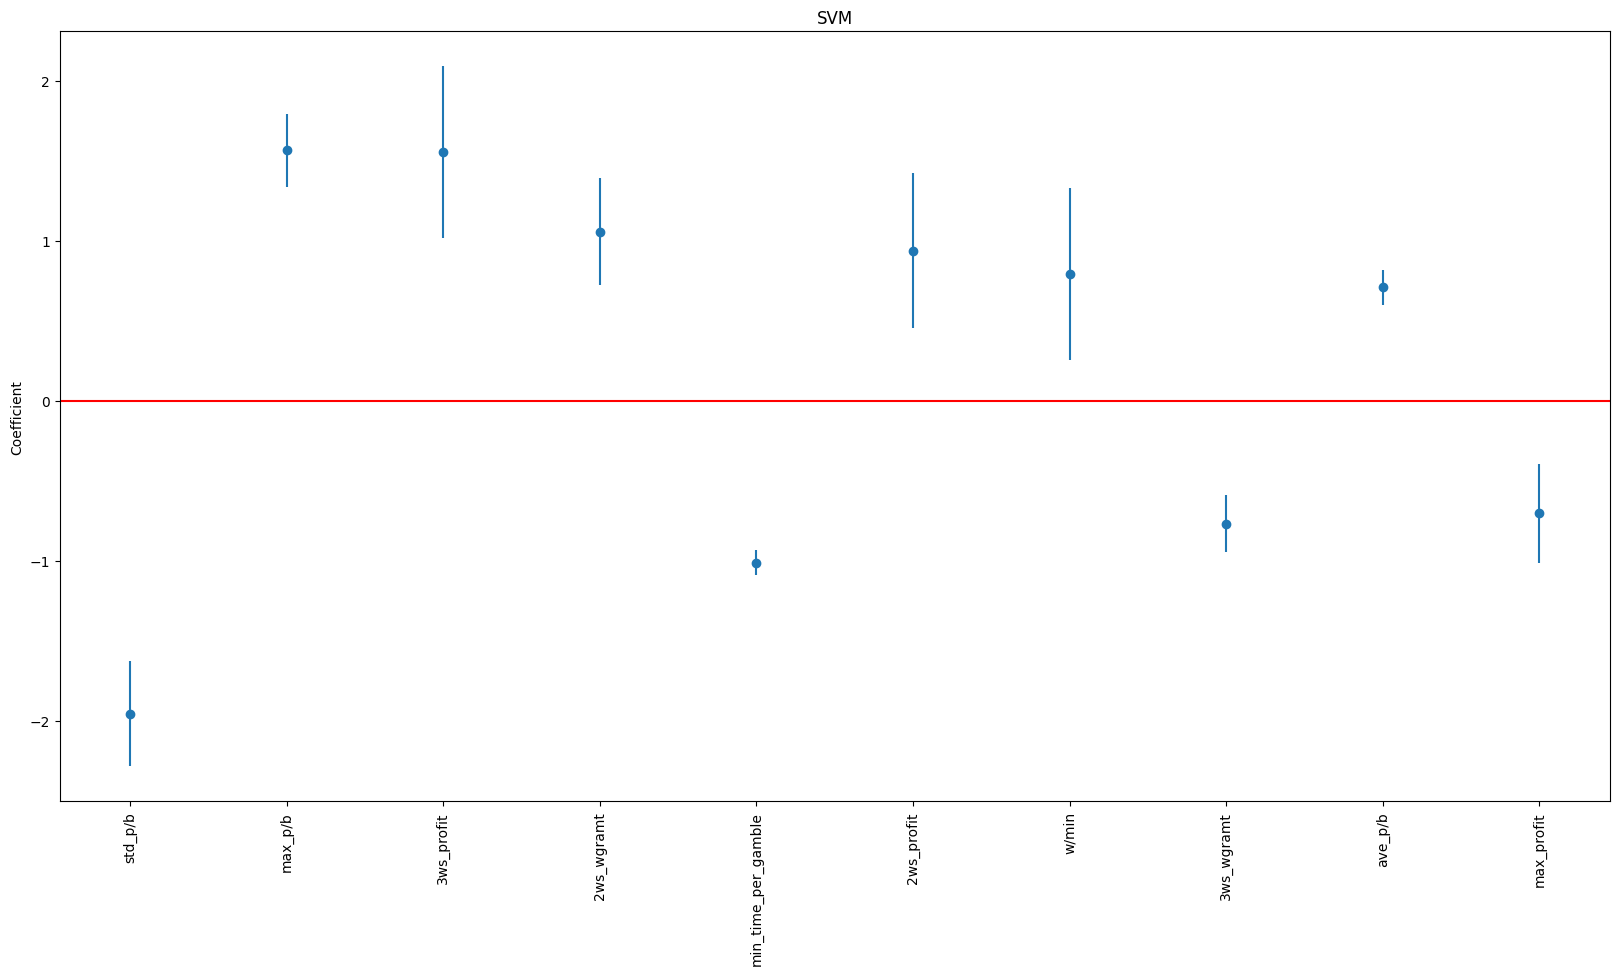

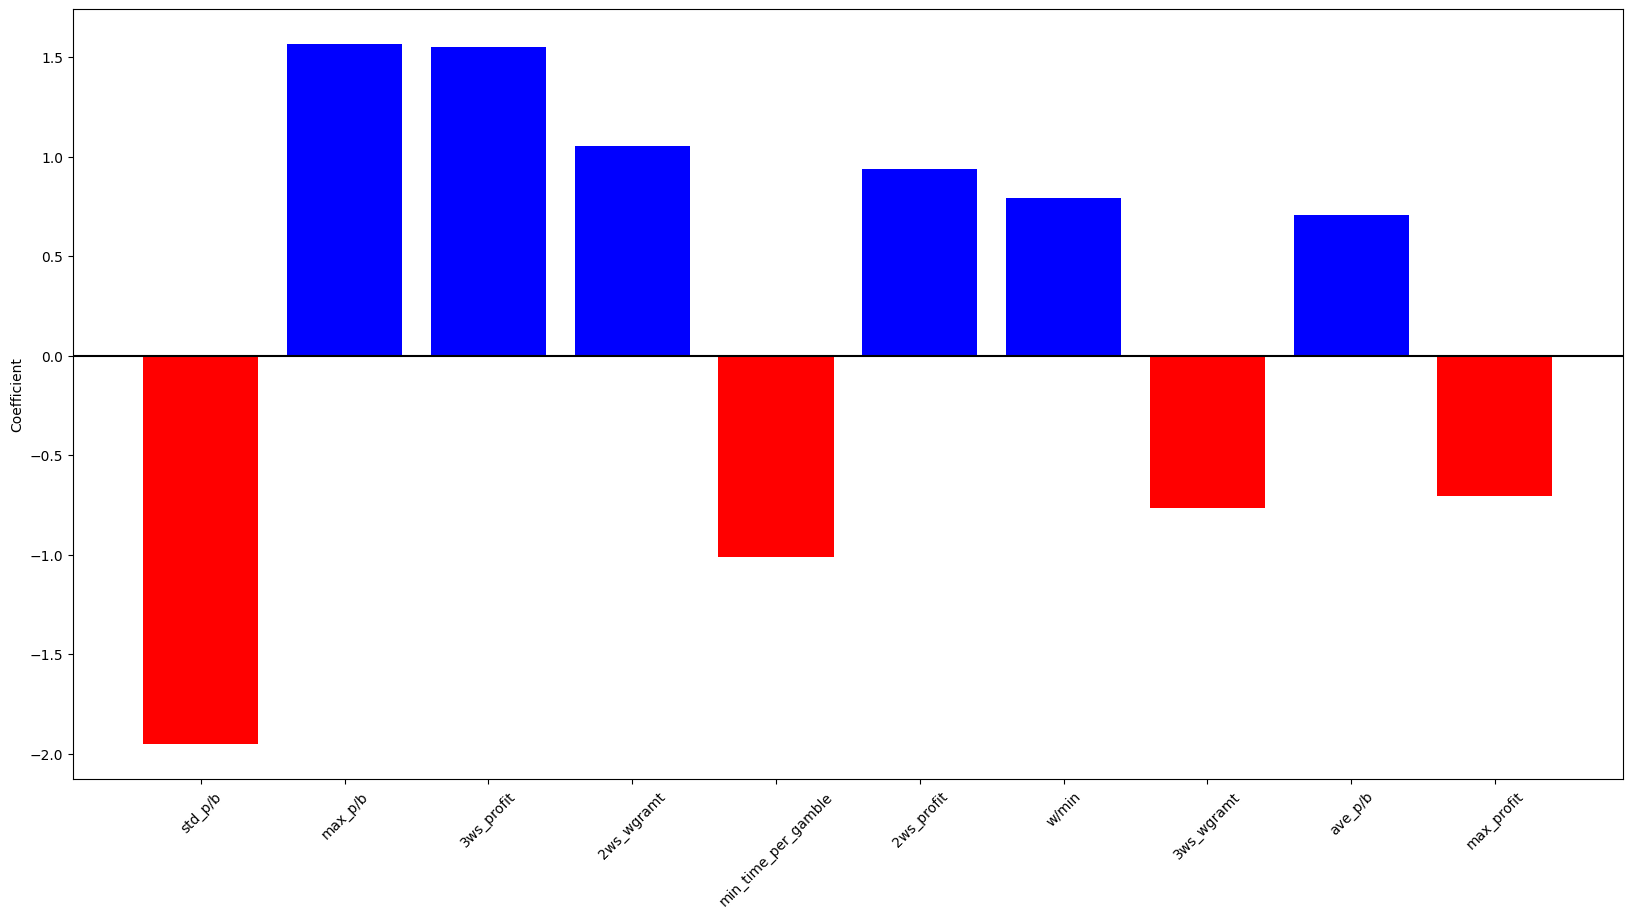

In [51]:
#Top 10
output_SVM = output_SVM.head(10)   

# Set the figure size
plt.rcParams["figure.figsize"] = (20,10)

# Plot the results
plt.errorbar(output_SVM['Feature'], output_SVM['mean'], yerr=output_SVM['std'], fmt='o')
plt.xticks(rotation=90)
plt.ylabel('Coefficient')
plt.title('SVM')
# Add a horizontal line at 0
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Make a bar plot
plt.bar(output_SVM['Feature'], output_SVM['mean'], color=np.where(output_SVM['mean']<0, 'red', 'blue'))
plt.xticks(rotation=45)
plt.ylabel('Coefficient')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

In [43]:
print(output_SVM)

               Feature      mean       std  abs_mean
0              std_p/b -1.954376  0.330032  1.954376
1              max_p/b  1.564581  0.229292  1.564581
2           3ws_profit  1.553539  0.534838  1.553539
3           2ws_wgramt  1.056514  0.335093  1.056514
4  min_time_per_gamble -1.011220  0.076982  1.011220
5           2ws_profit  0.937714  0.485518  0.937714
6                w/min  0.791931  0.538025  0.791931
7           3ws_wgramt -0.767151  0.175324  0.767151
8              ave_p/b  0.709751  0.109496  0.709751
9           max_profit -0.702937  0.309333  0.702937


In [46]:
## Random Forest
# Set the path to the csv files
data_path = '/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/Feauture Importance/Overall/RF'

datasets = {}

for month_file in months:
    name = 'dtf' + month_file[1:]
    dataset_path = f"{data_path}/{month_file}_features.csv"

    # Importing the dataset and keeping only selected columns
    dataset = pd.read_csv(dataset_path)
    datasets[name] = dataset  

# Concatenate all the datasets
df = pd.concat(datasets, ignore_index=True)

# Drop the first column
df = df.drop(df.columns[0], axis=1)

#calculate mean and standard deviation of Coefficient, grouped by team
output = df.groupby(['feature'], as_index=False).agg({'coefficient':['mean','std']})

#rename columns
output.columns = ['Feature', 'mean', 'std']

# Sort by absolute value of mean
output_RF = output.sort_values(by=['mean'], ascending=False).reset_index(drop=True)

# Delete 'encoder__' from the feature names
output_RF['Feature'] = output_RF['Feature'].str.replace('encoder__', '')

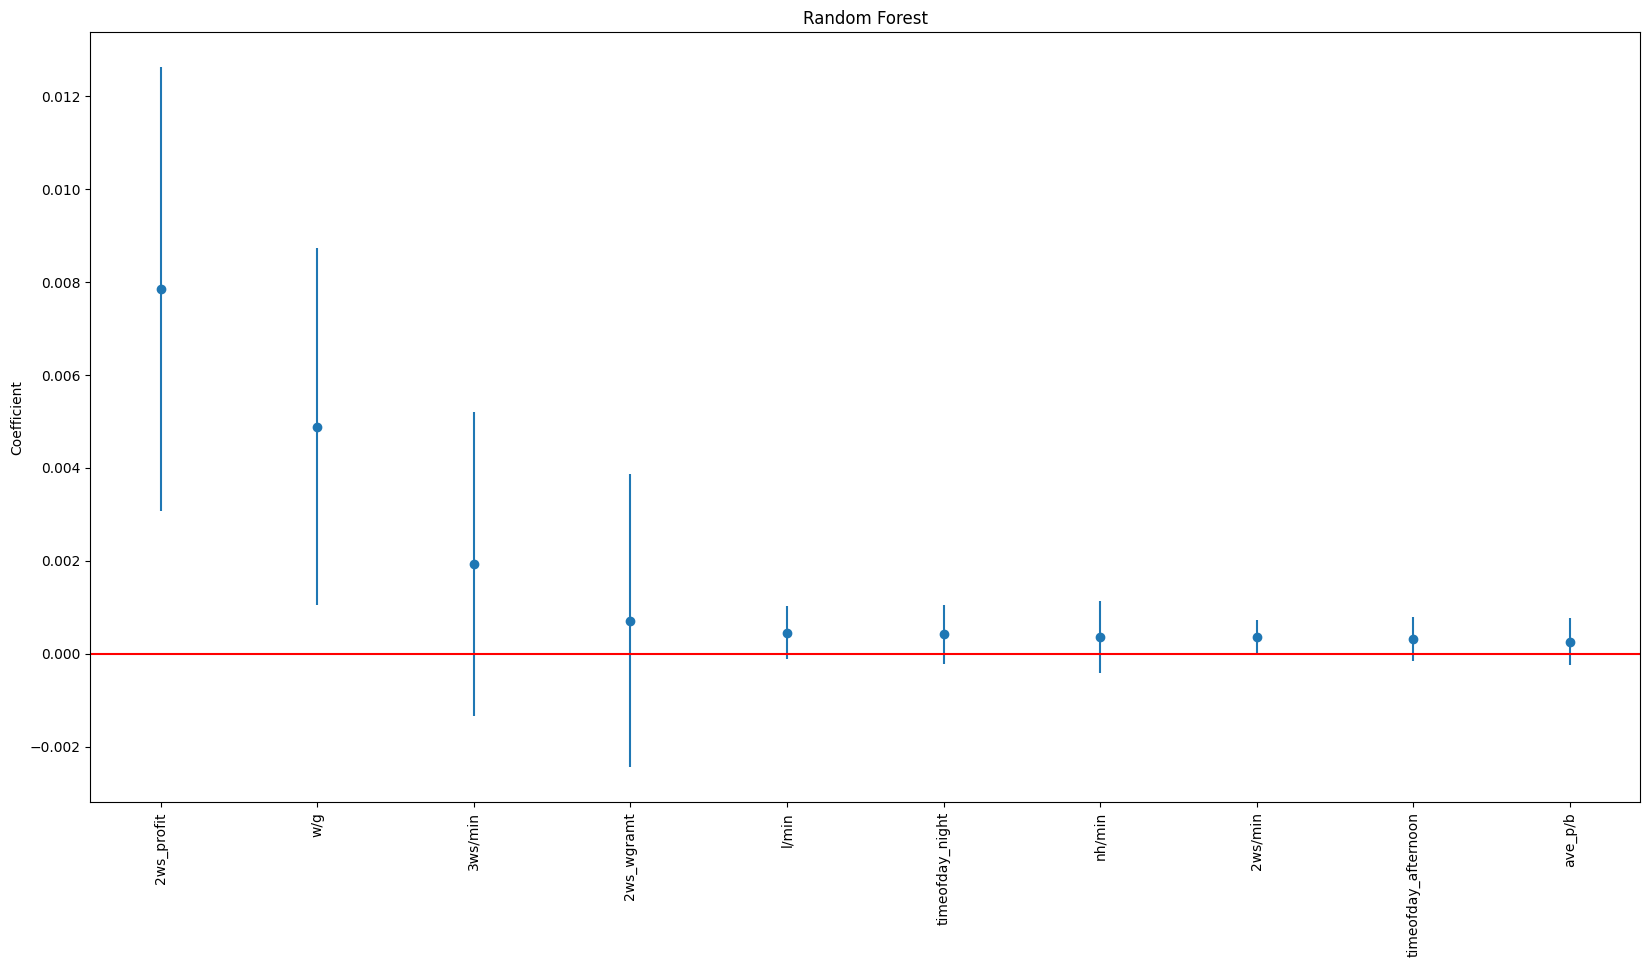

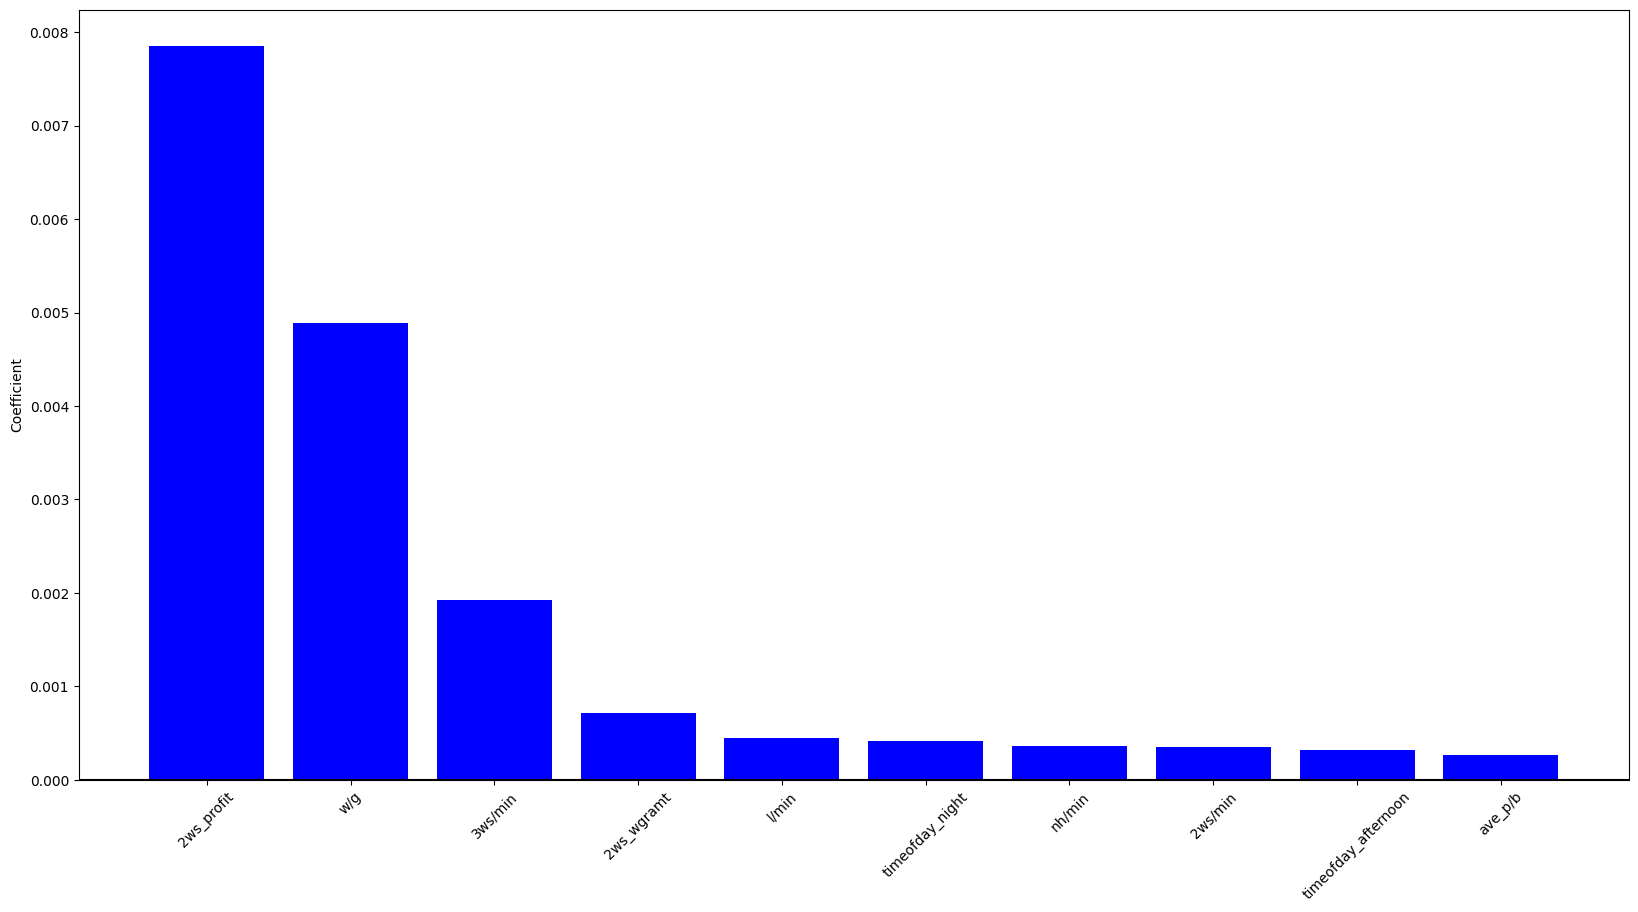

In [52]:
# Top 10
output_RF = output_RF.head(10)

# Set the figure size
plt.rcParams["figure.figsize"] = (20,10)

# Plot the results
plt.errorbar(output_RF['Feature'], output_RF['mean'], yerr=output_RF['std'], fmt='o')
plt.xticks(rotation=90)
plt.ylabel('Coefficient')
plt.title('Random Forest')
# Add a horizontal line at 0
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Make a bar plot
plt.bar(output_RF['Feature'], output_RF['mean'], color=np.where(output_RF['mean']<0, 'red', 'blue'))
plt.xticks(rotation=45)
plt.ylabel('Coefficient')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

In [41]:
print(output_RF)

                        Feature      mean       std
0                    2ws_profit  0.007849  0.004776
1                           w/g  0.004887  0.003840
2                       3ws/min  0.001928  0.003265
3                    2ws_wgramt  0.000713  0.003160
4                         l/min  0.000451  0.000577
5      encoder__timeofday_night  0.000413  0.000634
6                        nh/min  0.000366  0.000777
7                       2ws/min  0.000356  0.000370
8  encoder__timeofday_afternoon  0.000314  0.000475
9                       ave_p/b  0.000261  0.000505
